## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
data = pd.read_csv('titanic.csv')

## Removing some useless columns

In [ ]:
data.drop(columns='Name', inplace=True)

## Getting some informations about the dataset

In [ ]:
data.shape

(887, 7)

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [ ]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## The number of missing values

In [ ]:
data.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

## The number of unique values in each column

In [ ]:
data.nunique()

Survived                     2
Pclass                       3
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

## The unique values in each categorical column

In [ ]:
for column in data.columns:
  if data[column].dtype == 'object':
    print(f"{column}: {data[column].unique()}")

Sex: ['male' 'female']


## Encoding categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [ ]:
data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


## Getting the independent variables and the dependent variable

In [ ]:
X = data.drop(columns='Survived').values
y = data[['Survived']].values

In [ ]:
print(X.shape)
print(y.shape)

(887, 6)
(887, 1)


## Splitting the dataset into the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(709, 6)
(178, 6)
(709, 1)
(178, 1)


## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(709, 6)
(178, 6)
(709, 1)
(178, 1)


# Coding and Evaluating the Logistic Regression model (From scratch)

## Initializing parameters

In [ ]:
def initializing_parameters(dim):
  w = np.zeros((dim,1))
  b = 0
  return w, b

In [ ]:
w, b = initializing_parameters(X.shape[1])

## The sigmoid function

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## Defining the logistic regression model

In [ ]:
def model(w,b,X):
  z = np.dot(X,w) + b
  return sigmoid(z)

## Defining the loss function and then the cost function

In [ ]:
def cost_function(w,b,X,y):
  m = X.shape[0]
  return -1/m * np.sum(y*np.log(model(w,b,X)) + (1-y)*np.log(1-model(w,b,X)))

## Computing gradients

In [ ]:
def gradients(w,b,X,y):
  m = X.shape[0]
  dw = 1/m * np.dot(X.T, model(w,b,X)-y)
  db = 1/m * np.sum(model(w,b,X) - y)
  return dw, db

## Defining the optimization algorithm (Grdient Descent)

In [39]:
def gradient_descent(w,b,X,y,learning_rate,epochs):
  history = []
  for i in range(epochs):
    dw, db = gradients(w,b,X,y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    if i%1000 == 0:
      history.append(cost_function(w,b,X,y))
  return w,b,history

## Applying Gradient descent

In [40]:
w, b = initializing_parameters(X.shape[1])
learning_rate = 0.008
epochs = 10000
w_final, b_final, history = gradient_descent(w,b,X_train,y_train,learning_rate,epochs)

In [41]:
for h in range(len(history)):
  print(f"Iteration {(h+1)*1000:5d}: {history[h]}")

Iteration  1000: 0.69213270074591
Iteration  2000: 0.4604287795379196
Iteration  3000: 0.4432432172229419
Iteration  4000: 0.4391716170245075
Iteration  5000: 0.4377626127275643
Iteration  6000: 0.437181569704302
Iteration  7000: 0.43692008535133464
Iteration  8000: 0.4367970397652336
Iteration  9000: 0.4367377976573061
Iteration 10000: 0.43670893745350586


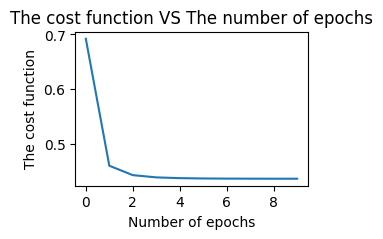

In [47]:
plt.figure(figsize=(3,2))
plt.plot(range(len(history)), history)
plt.xlabel('Number of epochs')
plt.ylabel('The cost function')
plt.title('The cost function VS The number of epochs')
plt.show()

## Building a predictive system

In [ ]:
def predict(w,b,X):
  return (model(w,b,X) >= 0.5).astype(int)

## Evaluating the model performance on the training set

In [ ]:
def accuracy_score1(w,b,X,y):
  return np.sum((predict(w,b,X) == y).astype(int)) / len(y)

In [ ]:
print(accuracy_score1(w_final,b_final,X_train,y_train))

0.8053596614950634


## Evaluating the model performance on the test set

In [ ]:
print(accuracy_score1(w_final,b_final,X_test,y_test))

0.7865168539325843


# Coding and Evaluating the Logistic Regression model (using the Sklearn library)

## The logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Evaluating the model performance on the training set

In [ ]:
from sklearn.metrics import accuracy_score
training_score = accuracy_score(y_train, classifier.predict(X_train))
print(f"Training score: {training_score}")

Training score: 0.8053596614950634


## Evaluating the model performance on the test set

In [ ]:
test_score = accuracy_score(y_test, classifier.predict(X_test))
print(f"Test score: {test_score}")

Test score: 0.7865168539325843
